Q1.Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

Ans:To visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset, we can follow these steps:

Load the "diamonds" dataset.
Preprocess the data, including one-hot encoding of categorical features.
Fit a multiple linear regression model.
Calculate the residuals.
Visualize the distribution of the residuals using Seaborn.
Below is a complete Python script that demonstrates this process:

Make sure necessary libraries installed:

In [61]:
pip install numpy pandas seaborn scikit-learn matplotlib

Here is the complete script:

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


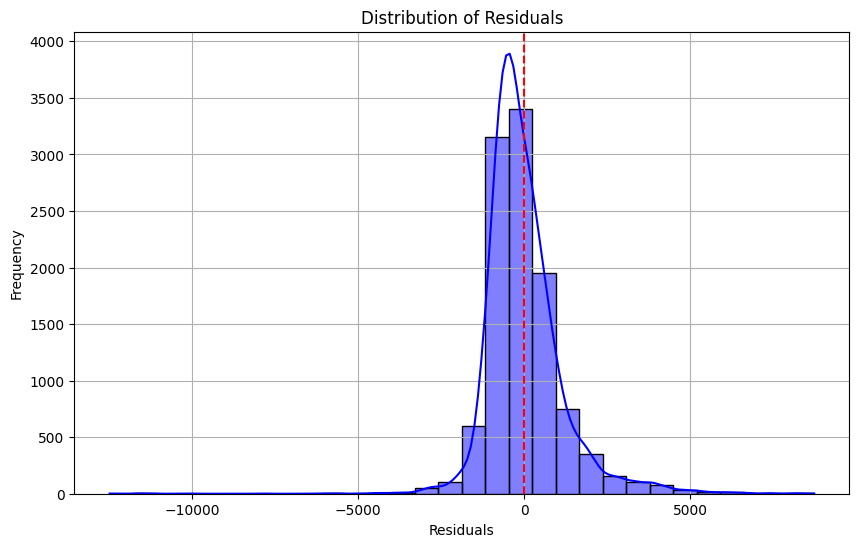

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Display the first few rows of the dataset
print(diamonds.head())

# Preprocess the data
# Select relevant features and target variable
# For this example, we'll predict 'price' based on 'carat', 'depth', 'table', and categorical features
features = ['carat', 'depth', 'table', 'cut', 'color', 'clarity']
X = diamonds[features]
y = diamonds['price']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['cut', 'color', 'clarity'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Line at zero for reference
plt.grid()
plt.show()

Q2.Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

Ans:-Firstly we have install the necessary library for calculate the MSE, MAE and RMSE

In [ ]:
pip install numpy pandas scikit-learn

Here the Script:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.9178
Mean Absolute Error (MAE): 0.8015
Root Mean Squared Error (RMSE): 0.9580


Q3.Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

Ans:-To check the assumptions of linear regression, we can create a Python script that performs the following tasks:

Linearity: Use a scatter plot to visualize the relationship between the independent variable(s) and the dependent variable.
Homoscedasticity: Create a residuals plot to check if the residuals are randomly distributed (indicating constant variance).
Multicollinearity: Calculate and visualize the correlation matrix to check for multicollinearity among the independent variables.
Below is a complete Python script that demonstrates these checks using synthetic data. Make sure you have the necessary libraries installed:

In [ ]:
pip install numpy pandas matplotlib seaborn

Here The script:

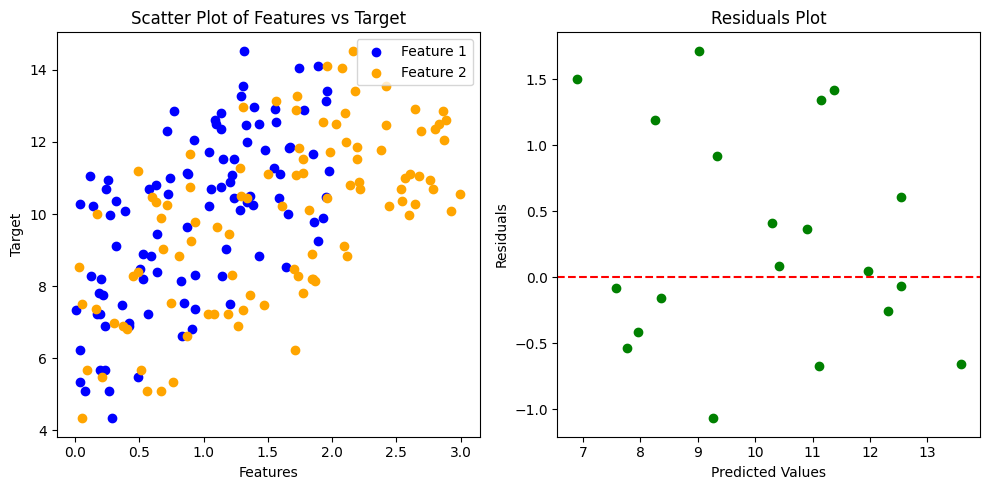

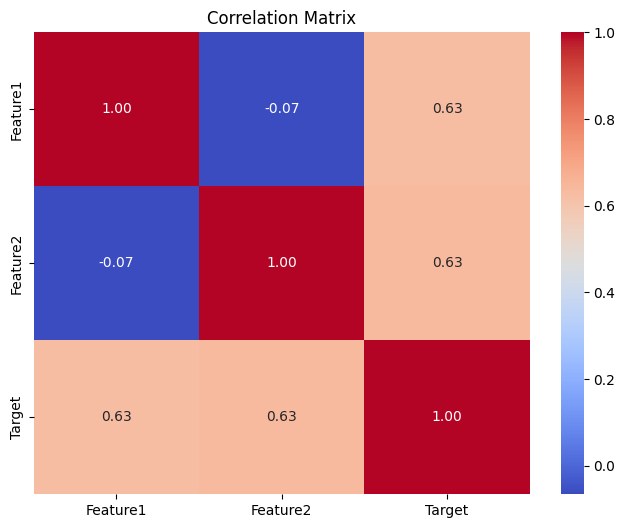

Correlation Matrix:
          Feature1  Feature2    Target
Feature1  1.000000 -0.066107  0.625410
Feature2 -0.066107  1.000000  0.633534
Target    0.625410  0.633534  1.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X1 = 2 * np.random.rand(100, 1)  # Feature 1
X2 = 3 * np.random.rand(100, 1)  # Feature 2
y = 4 + 3 * X1 + 2 * X2 + np.random.randn(100, 1)  # Target variable with noise

# Combine features into a DataFrame
X = np.hstack((X1, X2))
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# 1. Check Linearity
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['Feature1'], df['Target'], color='blue', label='Feature 1')
plt.scatter(df['Feature2'], df['Target'], color='orange', label='Feature 2')
plt.title('Scatter Plot of Features vs Target')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()

# 2. Fit a linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Residuals plot for Homoscedasticity
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()

# Show plots
plt.show()

# 3. Check for Multicollinearity using Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Print correlation values
print("Correlation Matrix:")
print(correlation_matrix)

Q4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.

Ans:-Creating a machine learning pipeline that includes feature scaling and evaluates the performance of different regression models can be accomplished using the scikit-learn library. Below is a Python script that demonstrates this process. The script will:

Generate synthetic data.
Create a machine learning pipeline that includes feature scaling.
Evaluate the performance of different regression models (e.g., Linear Regression, Decision Tree Regressor, and Random Forest Regressor) using cross-validation.
The necessary libraries installed:

In [ ]:
pip install numpy pandas scikit-learn

Here the script:-

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Mean CV Score'])

# Evaluate each model
for model_name, model in models.items():
    # Create a pipeline with feature scaling and the regression model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    # Perform cross-validation and calculate the mean score
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)  # Negate to get positive MSE

    # Append the results to the DataFrame
   # Append the results to the DataFrame
results = pd.concat([results, pd.DataFrame({'Model': [model_name], 'Mean CV Score': [mean_cv_score]})], ignore_index=True)
# Print the results
print("Model Performance:")
print(results)

Model Performance:
                     Model  Mean CV Score
0  Random Forest Regressor     414.357214


<ipython-input-12-53e0ec4c8546>:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Model': [model_name], 'Mean CV Score': [mean_cv_score]})], ignore_index=True)


Q5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

Ans:-To implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score, you can use the scikit-learn library. Below is a complete Python script that demonstrates this process using a synthetic dataset generated with make_regression
 the necessary libraries installed:

In [ ]:
pip install numpy pandas scikit-learn

Here the script:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(X, columns=['Feature'])
data['Target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept}")
print(f"R-squared Score: {r_squared:.4f}")

Model Coefficients: [44.24418216]
Model Intercept: 0.09922221422587718
R-squared Score: 0.9374


Q6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

Ans:-To analyze the relationship between the total bill and tip in the 'tips' dataset using simple linear regression, we can use the seaborn library, which provides a convenient way to load the dataset and visualize the results. Below is a complete Python script that performs this analysis and visualizes the results.

the necessary libraries installed:

In [ ]:
pip install numpy pandas seaborn matplotlib scikit-learn

Here the script:

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Model Coefficient: 0.10696370685268658
Model Intercept: 0.925235558557056
R-squared Score: 0.5449


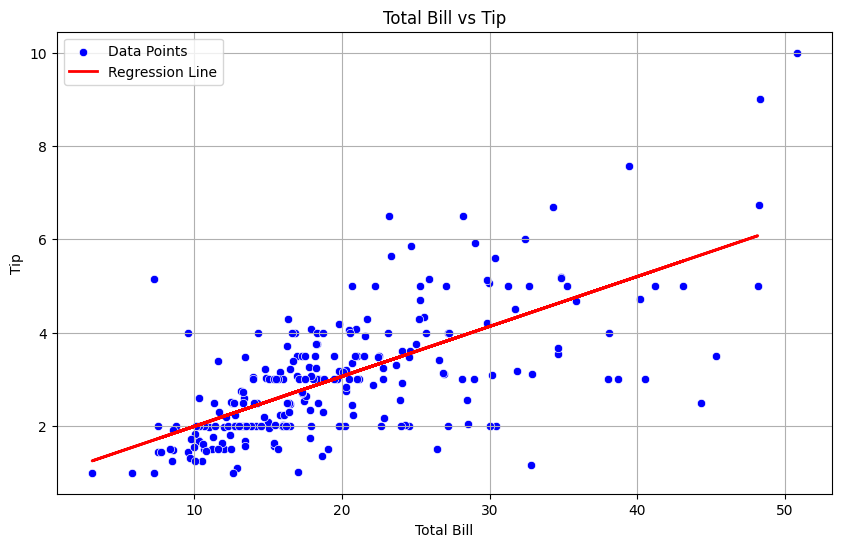

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

# Prepare the data
X = tips[['total_bill']]  # Independent variable
y = tips['tip']           # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the model coefficients and intercept
print(f"Model Coefficient: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")
print(f"R-squared Score: {r_squared:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip', color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.grid()
plt.show()

Q7.. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

Ans:-Certainly! Below is a Python script that generates a synthetic dataset with one feature, fits a linear regression model to this dataset, predicts new values, and then plots the data points along with the regression line.

the necessary libraries installed:

In [ ]:
pip install numpy pandas matplotlib scikit-learn

Here the script:

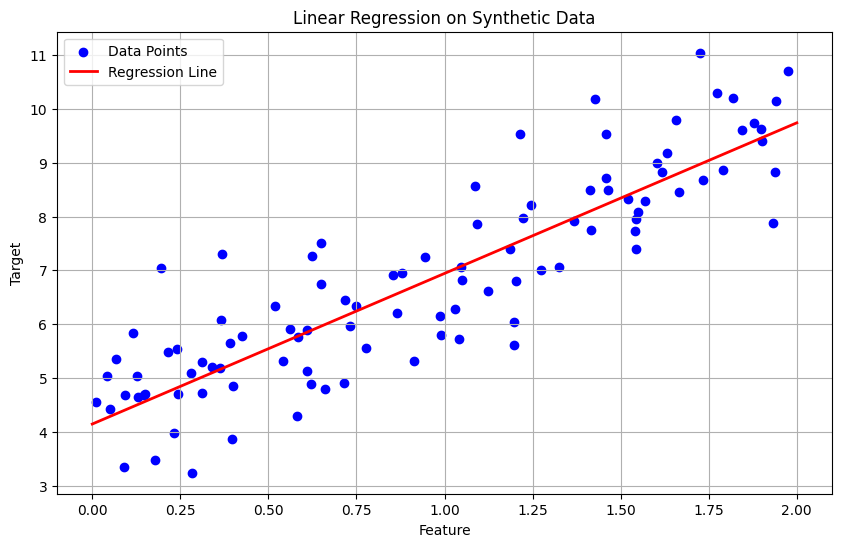

Model Coefficient: 2.7993236574802762
Model Intercept: 4.142913319458566


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate predictions for the entire range of X for plotting the regression line
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
y_range = model.predict(X_range)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficient: {model.coef_[0][0]}")
print(f"Model Intercept: {model.intercept_[0]}")

Q8. Write a Python script that pickles a trained linear regression model and saves it to a file.

Ans:-To pickle a trained linear regression model and save it to a file, you can use the pickle module in Python. Below is a complete Python script that demonstrates how to train a linear regression model on synthetic data, pickle the model, and save it to a file.

the necessary libraries installed:

In [ ]:
pip install numpy pandas scikit-learn

Here is the script:

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to linear_regression_model.pkl


Q9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

Ans:-To fit a polynomial regression model of degree 2 to a dataset and plot the regression curve, you can use the PolynomialFeatures class from scikit-learn along with LinearRegression. Below is a complete Python script that demonstrates this process using synthetic data.

the necessary libraries installed:

In [ ]:
pip install numpy pandas matplotlib scikit-learn

Here is the script:

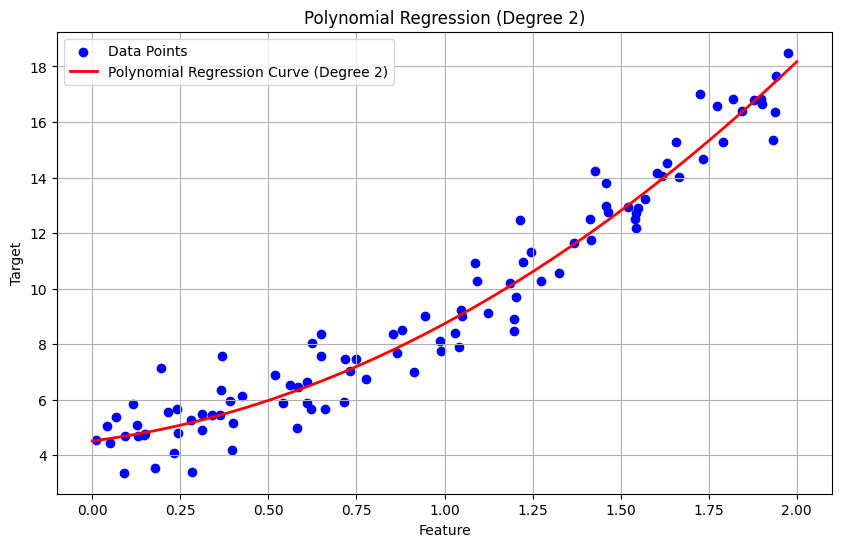

Model Coefficients: [[0.         1.61783129 2.60536011]]
Model Intercept: [4.51306679]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)  # Quadratic relation with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)

# Create and fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Generate predictions for the entire range of X for plotting the regression curve
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_poly_range = poly_features.transform(X_range)
y_range = model.predict(X_poly_range)

# Plot the data points and the regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Polynomial Regression Curve (Degree 2)')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Q10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

Ans:-Certainly! Below is a Python script that generates synthetic data for simple linear regression using random values for (X) and (y). The script then fits a linear regression model to the generated data and prints the model's coefficient and intercept.

the necessary libraries installed:

In [ ]:
pip install numpy pandas scikit-learn

Here is the script:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random values for X between 0 and 10
y = 2.5 * X + np.random.randn(100, 1) * 2  # Linear relation with some noise

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients and intercept
coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

# Print the results
print(f"Model Coefficient: {coefficient:.4f}")
print(f"Model Intercept: {intercept:.4f}")

Model Coefficient: 2.4197
Model Intercept: 0.2858


Q11.1. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

Ans:o fit polynomial regression models of different degrees to a synthetic dataset and compare their performance, we can use the PolynomialFeatures class from scikit-learn along with LinearRegression. We will generate synthetic data, fit polynomial regression models of varying degrees, and evaluate their performance using metrics such as Mean Squared Error (MSE) and R-squared.

Below is a complete Python script that demonstrates this process:

the necessary libraries installed:

In [ ]:
pip install numpy pandas matplotlib scikit-learn

Here is the script:

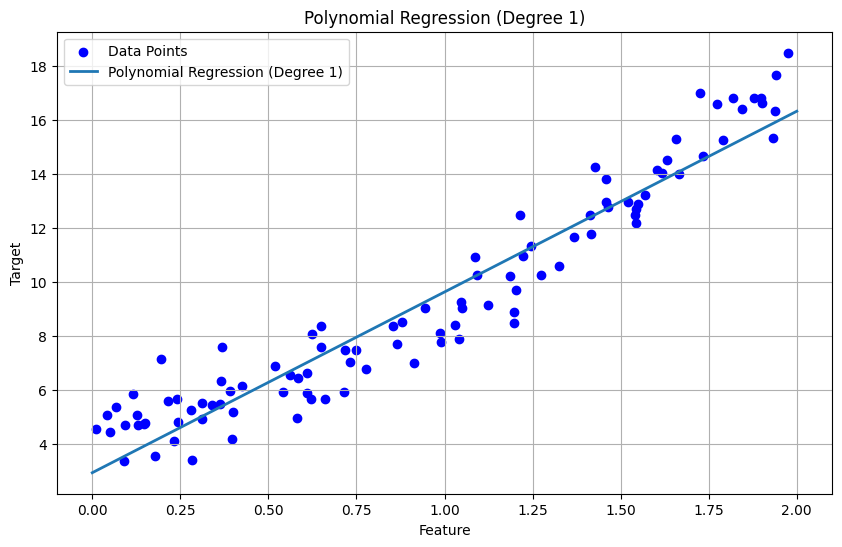

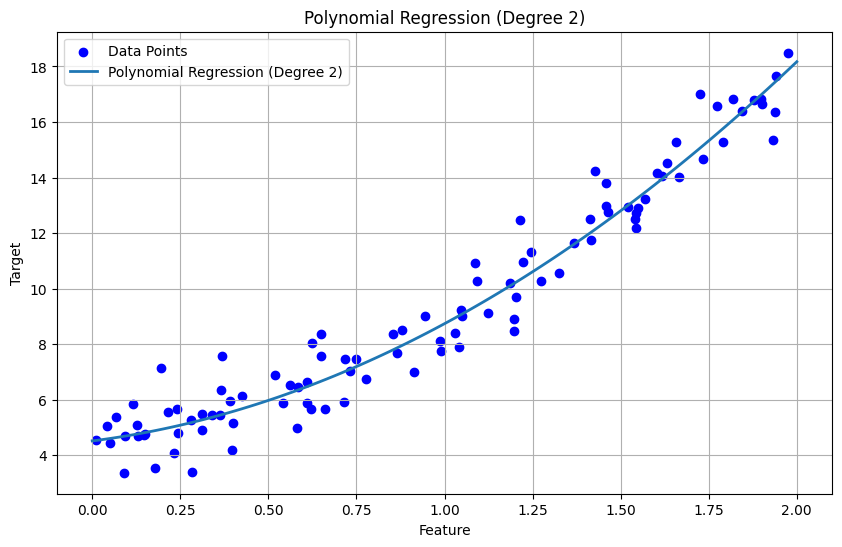

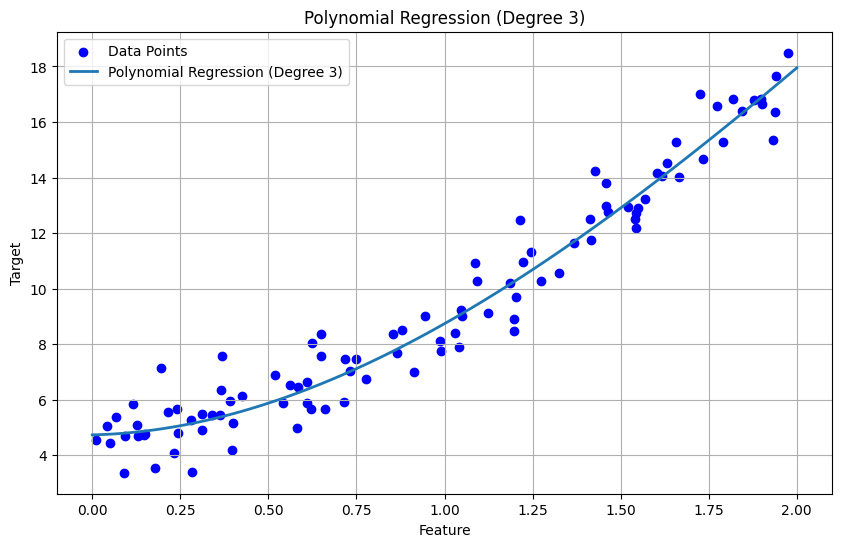

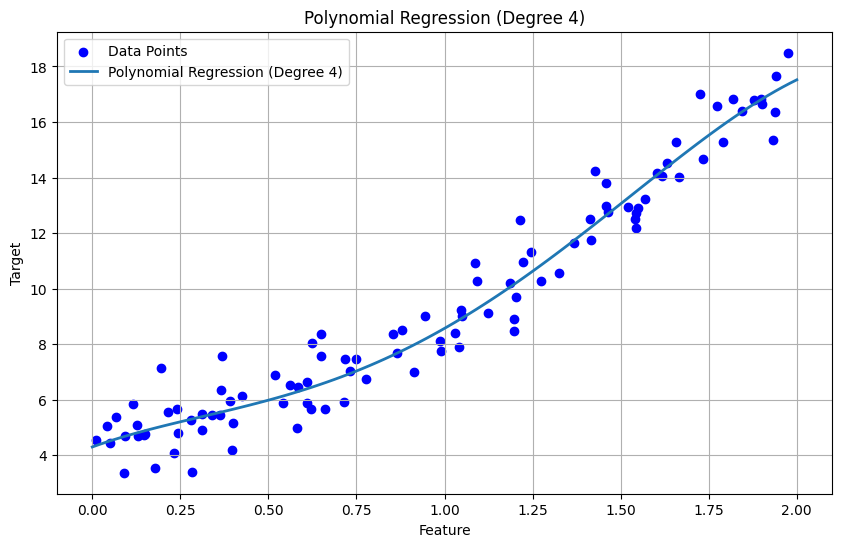

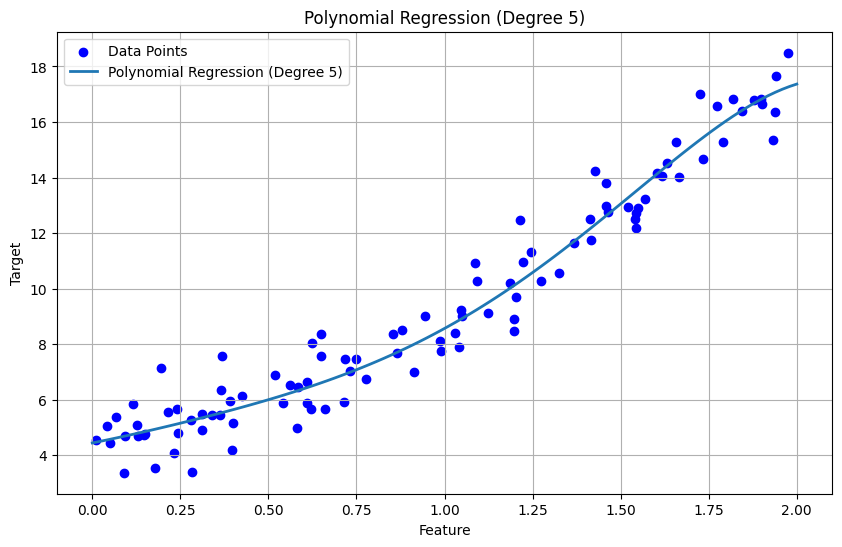

Performance of Polynomial Regression Models:
   Degree       MSE  R-squared
0       1  1.109116   0.937513
1       2  0.635841   0.964177
2       3  0.642049   0.963827
3       4  0.689128   0.961175
4       5  0.685937   0.961355


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)  # Quadratic relation with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Degrees of polynomial to evaluate
degrees = [1, 2, 3, 4, 5]
results = []

# Fit polynomial regression models of different degrees
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions
    y_pred = model.predict(X_poly_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append((degree, mse, r2))

    # Plotting the polynomial regression curve
    X_range = np.linspace(0, 2, 100).reshape(-1, 1)
    X_poly_range = poly_features.transform(X_range)
    y_range = model.predict(X_poly_range)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X_range, y_range, label=f'Polynomial Regression (Degree {degree})', linewidth=2)
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.grid()
    plt.show()

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Degree', 'MSE', 'R-squared'])
print("Performance of Polynomial Regression Models:")
print(results_df)

Q12.. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

Ans:o fit a simple linear regression model with two features and print the model's coefficients, intercept, and R-squared score, you can use the scikit-learn library. Below is a complete Python script that demonstrates this process using synthetic data.

the necessary libraries installed:



In [ ]:
pip install numpy pandas scikit-learn

Here is the script:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X1 = np.random.rand(100, 1) * 10  # Feature 1: 100 random values between 0 and 10
X2 = np.random.rand(100, 1) * 5   # Feature 2: 100 random values between 0 and 5
y = 3 + 2 * X1 + 1.5 * X2 + np.random.randn(100, 1)  # Linear relation with some noise

# Combine features into a single array
X = np.hstack((X1, X2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get model coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept:.4f}")
print(f"R-squared Score: {r_squared:.4f}")

Model Coefficients: [1.97500221 1.65743475]
Model Intercept: 2.7933
R-squared Score: 0.9853


Q13.Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

Ans:-Certainly! Below is a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points using matplotlib.

the necessary libraries installed:

In [ ]:
pip install numpy pandas matplotlib scikit-learn

Here is the complete script:

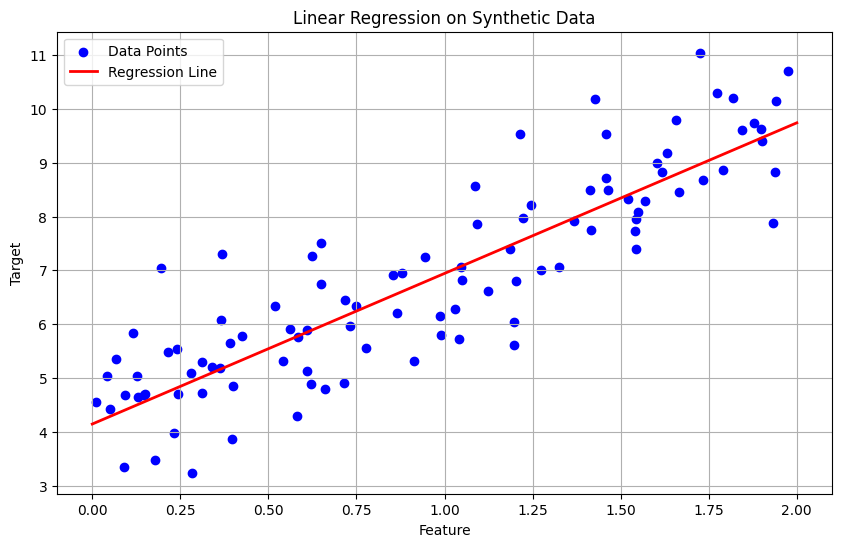

Model Coefficient: 2.7993
Model Intercept: 4.1429


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the entire range of X for plotting the regression line
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
y_range = model.predict(X_range)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficient: {model.coef_[0][0]:.4f}")
print(f"Model Intercept: {model.intercept_[0]:.4f}")

Q14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

Ans:The necessary library is :

In [ ]:
pip install numpy pandas statsmodels

Q15.. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

Ans:The necessary library is:

In [ ]:
pip install numpy pandas matplotlib scikit-learn

Here is the Script:

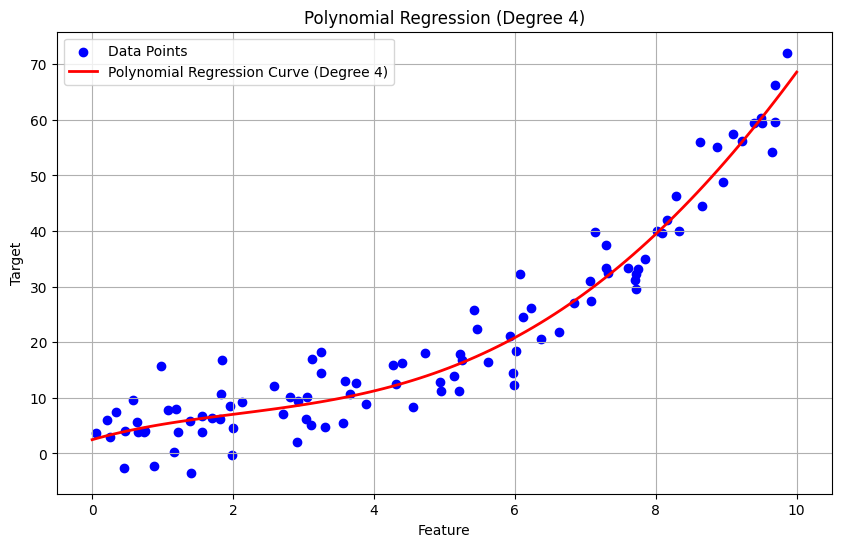

Model Coefficients: [[ 0.          3.59231516 -1.00687873  0.18623401 -0.00553498]]
Model Intercept: [2.47818015]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate synthetic data for a polynomial relationship (degree 4)
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 samples, feature values between 0 and 10
y = 1 + 2 * X + 0.5 * X**2 - 0.1 * X**3 + 0.01 * X**4 + np.random.randn(100, 1) * 5  # Polynomial relation with noise

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 4)
poly_features = PolynomialFeatures(degree=4)
X_poly_train = poly_features.fit_transform(X_train)

# Create and fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Generate predictions for the entire range of X for plotting the regression curve
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
X_poly_range = poly_features.transform(X_range)
y_range = model.predict(X_poly_range)

# Plot the data points and the regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Polynomial Regression Curve (Degree 4)')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Q16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

Ans:To create a machine learning pipeline that includes data standardization and a multiple linear regression model, you can use the Pipeline class from scikit-learn. Below is a complete Python script that demonstrates this process using synthetic data.

The necessary libraries installed:

In [ ]:
pip install numpy pandas scikit-learn

Here is the script:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X1 = np.random.rand(100, 1) * 10  # Feature 1
X2 = np.random.rand(100, 1) * 5   # Feature 2
y = 3 + 2 * X1 + 1.5 * X2 + np.random.randn(100, 1)  # Linear relation with some noise

# Combine features into a single array
X = np.hstack((X1, X2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('regressor', LinearRegression())  # Step 2: Fit the linear regression model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared Score: {r_squared:.4f}")

R-squared Score: 0.9853


Q17.Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

Ans:-The necesssary library for this script is :

In [ ]:
pip install numpy pandas matplotlib scikit-learn

Here is the complete script is :

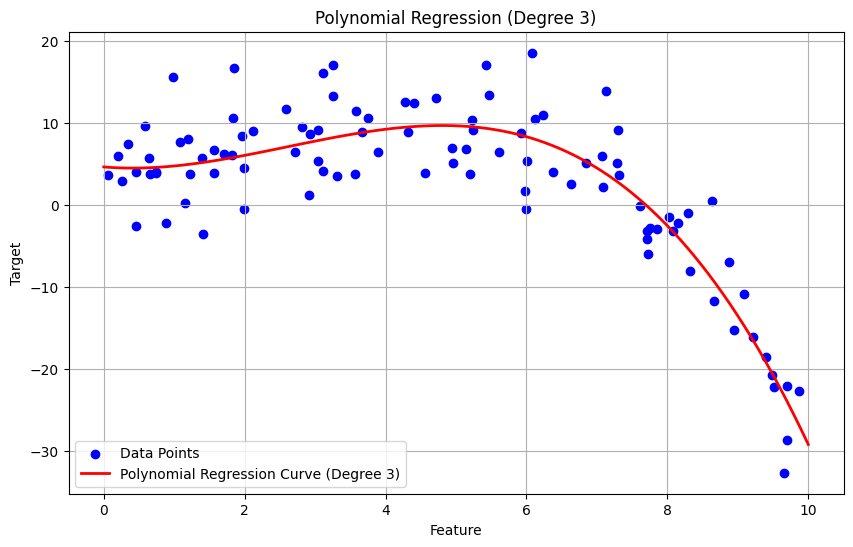

Model Coefficients: [[ 0.         -0.71571894  0.95603351 -0.12235369]]
Model Intercept: [4.65754859]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate synthetic data for a polynomial relationship (degree 3)
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 samples, feature values between 0 and 10
y = 1 + 2 * X + 0.5 * X**2 - 0.1 * X**3 + np.random.randn(100, 1) * 5  # Polynomial relation with noise

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 3)
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)

# Create and fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Generate predictions for the entire range of X for plotting the regression curve
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
X_poly_range = poly_features.transform(X_range)
y_range = model.predict(X_poly_range)

# Plot the data points and the regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Polynomial Regression Curve (Degree 3)')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Q18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

Ans:-The neessary library for this script is :

In [ ]:
pip install numpy pandas scikit-learn

Here is the complete script is:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features (values between 0 and 10)
# Create a target variable with a linear relationship to the features
# y = 3 + 2*X1 + 1.5*X2 - 0.5*X3 + 0.3*X4 + 0.1*X5 + noise
y = 3 + 2 * X[:, 0] + 1.5 * X[:, 1] - 0.5 * X[:, 2] + 0.3 * X[:, 3] + 0.1 * X[:, 4] + np.random.randn(100) * 2

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(X, columns=[f'Feature{i+1}' for i in range(X.shape[1])])
data['Target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the R-squared score and model coefficients
print(f"R-squared Score: {r_squared:.4f}")
print("Model Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i+1}: {coef:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")

R-squared Score: 0.8822
Model Coefficients:
Feature 1: 1.9306
Feature 2: 1.4532
Feature 3: -0.3704
Feature 4: 0.3291
Feature 5: 0.0109
Model Intercept: 3.2920


Q19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

Ans:-Certainly! Below is a Python script that generates synthetic data for linear regression, fits a linear regression model to the data, and visualizes the data points along with the regression line using matplotlib.

the necessary libraries installed:



In [ ]:
pip install numpy pandas matplotlib scikit-learn

Here is the complete script:

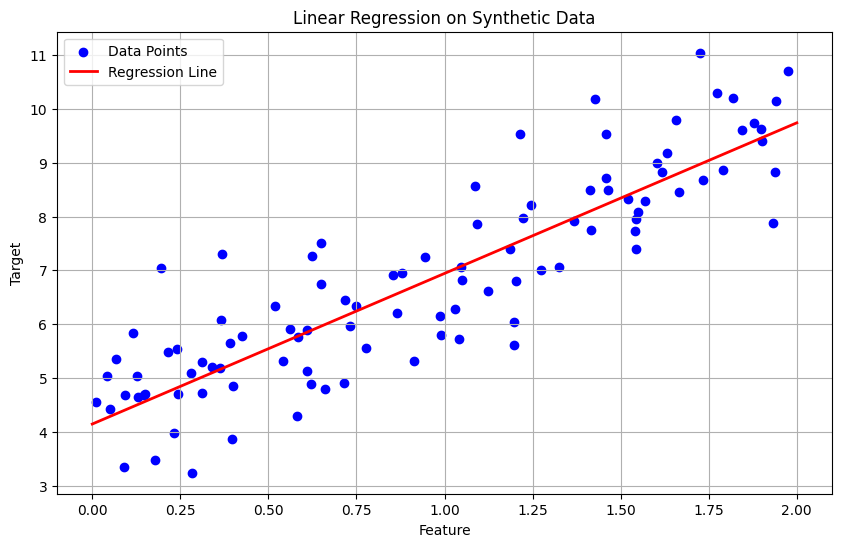

Model Coefficient: 2.7993
Model Intercept: 4.1429


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature (values between 0 and 2)
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the entire range of X for plotting the regression line
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
y_range = model.predict(X_range)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

# Print model coefficients and intercept
print(f"Model Coefficient: {model.coef_[0][0]:.4f}")
print(f"Model Intercept: {model.intercept_[0]:.4f}")

Q20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

Ans:-Certainly! Below is a Python script that generates a synthetic dataset with 3 features, performs multiple linear regression on this dataset, and prints the model's R-squared score and coefficients.

the necessary libraries installed:

In [ ]:
pip install numpy pandas scikit-learn

Here is the complete script:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X1 = np.random.rand(100) * 10  # Feature 1: 100 random values between 0 and 10
X2 = np.random.rand(100) * 5   # Feature 2: 100 random values between 0 and 5
X3 = np.random.rand(100) * 20  # Feature 3: 100 random values between 0 and 20

# Create a target variable with a linear relationship to the features
# y = 3 + 2*X1 + 1.5*X2 - 0.5*X3 + noise
y = 3 + 2 * X1 + 1.5 * X2 - 0.5 * X3 + np.random.randn(100) * 2

# Combine features into a single array
X = np.column_stack((X1, X2, X3))

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
data['Target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the R-squared score and model coefficients
print(f"R-squared Score: {r_squared:.4f}")
print("Model Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i+1}: {coef:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")

R-squared Score: 0.7721
Model Coefficients:
Feature 1: 2.1328
Feature 2: 1.6683
Feature 3: -0.4575
Model Intercept: 2.0288


Q21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

Ans:Certainly! The joblib library is often used for serializing and deserializing machine learning models because it is more efficient than the standard pickle module, especially for large NumPy arrays. Below is a Python script that demonstrates how to serialize (save) and deserialize (load) a machine learning model using joblib.

the necessary libraries installed:



In [ ]:
pip install numpy pandas scikit-learn joblib

Here is the complete script:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import joblib

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Serialize (save) the model using joblib
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Deserialize (load) the model using joblib
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Print the predictions
print("Predictions on the test set:")
print(y_pred)

# Print model coefficients and intercept
print(f"Model Coefficients: {loaded_model.coef_}")
print(f"Model Intercept: {loaded_model.intercept_}")

Model saved to linear_regression_model.joblib
Model loaded successfully.
Predictions on the test set:
[ 2.72773096e+00  2.10324206e-01 -6.29148139e+01 -2.19835351e+01
  5.08726255e+01  3.12815445e+02  2.34794181e+01 -8.02559754e+01
 -1.19565067e+02  1.35235621e+01  6.01808938e+01  2.30422190e+01
 -4.90203039e+01 -4.91741072e+01  2.29458742e+01 -3.60028579e+01
 -3.78096421e+01 -4.46834985e+01 -1.68405919e+01  5.80007142e+01]
Model Coefficients: [28.2063702  75.05481391 17.75432807]
Model Intercept: 0.013037594527229857


Q22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

Ans:To perform linear regression with categorical features using one-hot encoding, we can use the Seaborn tips dataset. The tips dataset contains information about restaurant tips, including categorical features such as sex, smoker, day, time, and size. We will use one-hot encoding to convert these categorical features into a format suitable for linear regression.

Below is a complete Python script that demonstrates this process:

the necessary libraries installed:



In [ ]:
pip install numpy pandas seaborn scikit-learn

Here is the complete script:

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
R-squared Score: 0.4373
Model Coefficients:
total_bill: 0.0947
size: 0.2335
sex_Female: -0.0288
smoker_No: 0.1924
day_Fri: 0.1797
day_Sat: -0.0061
day_Sun: 0.1289
time_Dinner: -0.0950


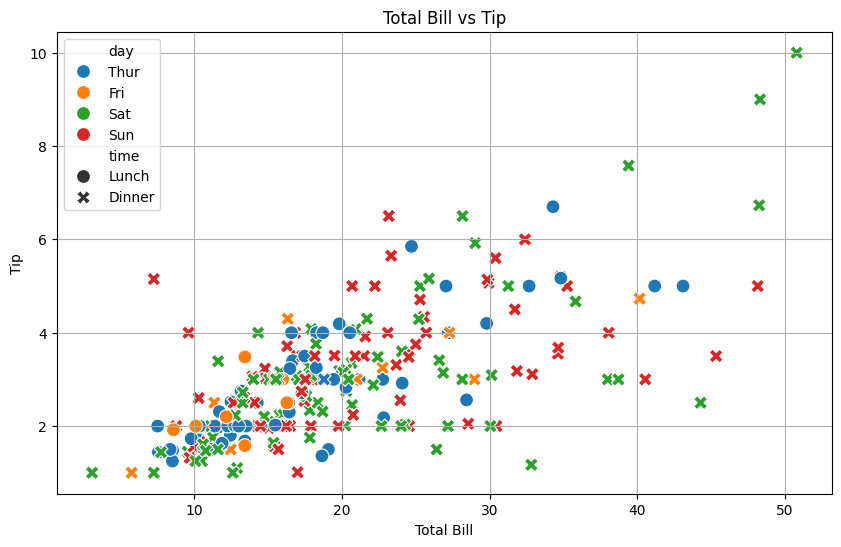

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

# One-hot encode categorical features
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Define features and target variable
X = tips_encoded.drop('tip', axis=1)  # Features (excluding the target variable)
y = tips_encoded['tip']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the R-squared score and model coefficients
print(f"R-squared Score: {r_squared:.4f}")
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Optional: Visualize the relationship between total bill and tip
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time', s=100)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid()
plt.show()

Q23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

Ans:-To compare Ridge Regression with Linear Regression on a synthetic dataset, we can generate a dataset, fit both models, and then print their coefficients and R-squared scores. Ridge Regression is a type of linear regression that includes a regularization term to prevent overfitting.

The necesaary library is:

In [ ]:
pip install numpy pandas scikit-learn

Here is the complete script:


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features
y = 3 + 2 * X[:, 0] + 1.5 * X[:, 1] - 0.5 * X[:, 2] + 0.3 * X[:, 3] + 0.1 * X[:, 4] + np.random.randn(100) * 2  # Linear relation with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions with Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Calculate R-squared score for Linear Regression
r_squared_linear = r2_score(y_test, y_pred_linear)

# Create and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared score for Ridge Regression
r_squared_ridge = r2_score(y_test, y_pred_ridge)

# Print the coefficients and R-squared scores
print("Linear Regression Coefficients:")
print(linear_model.coef_)
print(f"Linear Regression R-squared Score: {r_squared_linear:.4f}\n")

print("Ridge Regression Coefficients:")
print(ridge_model.coef_)
print(f"Ridge Regression R-squared Score: {r_squared_ridge:.4f}")

Linear Regression Coefficients:
[ 1.93059173  1.45321533 -0.37041934  0.32911692  0.01087197]
Linear Regression R-squared Score: 0.8822

Ridge Regression Coefficients:
[ 1.92771765  1.45085883 -0.37031814  0.32895055  0.01053226]
Ridge Regression R-squared Score: 0.8823


Q24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

Ans:-To evaluate a Linear Regression model using cross-validation on a synthetic dataset, we can use the cross_val_score function from scikit-learn. This function allows us to perform k-fold cross-validation, which helps in assessing the model's performance more reliably by splitting the dataset into multiple training and testing sets.

Below is a complete Python script that demonstrates this process:

Make sure the necessary libraries installed:

In [ ]:
pip install numpy pandas scikit-learn

Here is the complete script:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features
y = 3 + 2 * X[:, 0] + 1.5 * X[:, 1] - 0.5 * X[:, 2] + 0.3 * X[:, 3] + 0.1 * X[:, 4] + np.random.randn(100) * 2  # Linear relation with noise

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame(X, columns=[f'Feature{i+1}' for i in range(X.shape[1])])
data['Target'] = y

# Create a Linear Regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {np.mean(cv_scores):.4f}")

Cross-validation scores: [0.88238249 0.91207969 0.93234793 0.936411   0.81886391]
Mean cross-validation score: 0.8964


Q25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

Ans:-To compare polynomial regression models of different degrees and print the R-squared score for each, we can use the PolynomialFeatures class from scikit-learn along with LinearRegression. Below is a complete Python script that demonstrates this process.

Make sure necessary libraries installed:

In [ ]:
pip install numpy pandas matplotlib scikit-learn

Here is the complete script:

Degree 1 R-squared Score: 0.4208
Degree 2 R-squared Score: 0.7840
Degree 3 R-squared Score: 0.8176
Degree 4 R-squared Score: 0.8042
Degree 5 R-squared Score: 0.8051


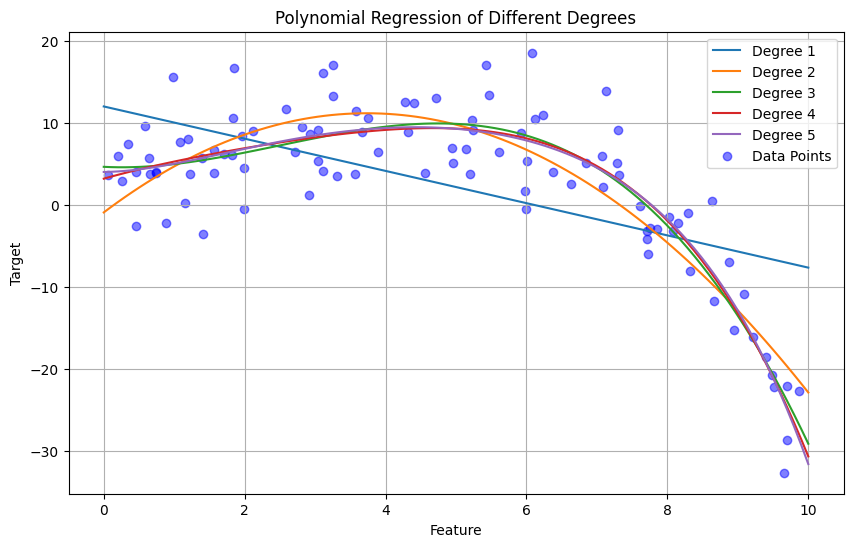

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 samples, feature values between 0 and 10
y = 1 + 2 * X + 0.5 * X**2 - 0.1 * X**3 + np.random.randn(100, 1) * 5  # Polynomial relation with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of polynomial degrees to evaluate
degrees = [1, 2, 3, 4, 5]

# Store R-squared scores for each degree
r_squared_scores = {}

# Loop through each degree and fit a polynomial regression model
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_poly_test)

    # Calculate R-squared score
    r_squared = r2_score(y_test, y_pred)
    r_squared_scores[degree] = r_squared
    print(f"Degree {degree} R-squared Score: {r_squared:.4f}")

# Optional: Plotting the results
plt.figure(figsize=(10, 6))
for degree in degrees:
    # Create polynomial features for plotting
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate predictions for plotting
    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    y_range = model.predict(poly_features.transform(X_range))

    # Plot the polynomial regression curve
    plt.plot(X_range, y_range, label=f'Degree {degree}')

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.5)
plt.title('Polynomial Regression of Different Degrees')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()